# Part 2: K-Means Clustering

In this notebook, we will explore **K-Means Clustering**, one of the most popular unsupervised learning algorithms. It is widely used for discovering groups or clusters in a dataset.

---

## What is K-Means Clustering?

**K-Means Clustering** is an algorithm that groups data into a predefined number of clusters. Each data point is assigned to the nearest cluster based on its distance to the cluster's centroid.

### Key Steps in K-Means:

1. **Select K**: Choose the number of clusters (`K`).
2. **Initialize Centroids**: Randomly initialize `K` centroids in the dataset.
3. **Assign Points**: Assign each data point to the nearest centroid.
4. **Update Centroids**: Recalculate the centroids by taking the mean of all points assigned to each cluster.
5. **Repeat**: Repeat the assignment and update steps until the centroids no longer change or change minimally.

---

## Example of K-Means Clustering

We will use the **Iris dataset**, a famous dataset used in clustering and classification tasks, to implement K-Means clustering.

### Step 1: Load the Iris Dataset

We will start by loading the Iris dataset from Scikit-learn and visualizing its structure.

In [15]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Step 2: Visualizing the Data

Before applying K-Means, let’s visualize the data. Since the Iris dataset has four features, we will only plot the first two features (sepal length and sepal width) for simplicity.

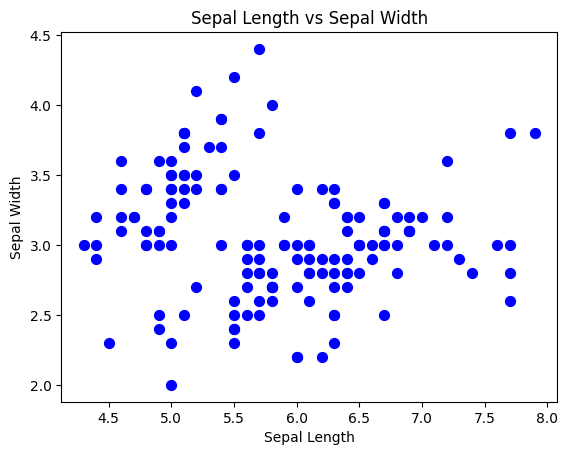

In [25]:
# Plot the data
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='blue', s=50)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

### Step 3: Applying K-Means Clustering

We will now apply the K-Means algorithm with `K=3` (since there are three species of flowers in the Iris dataset).

In [27]:
from sklearn.cluster import KMeans

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

# Get the cluster labels and add them to the DataFrame
df['Cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


### Step 4: Visualizing the Clusters

We will now visualize the clusters that were identified by K-Means. Each cluster will be represented by a different color.

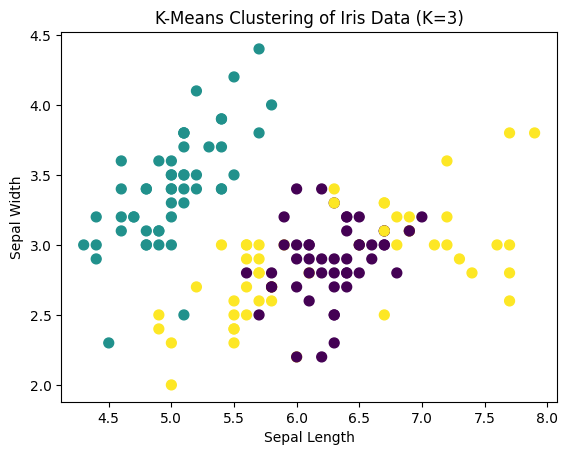

In [28]:
# Plot the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering of Iris Data (K=3)')
plt.show()

### Step 5: Evaluating K-Means with the Elbow Method

One of the most common methods to find the optimal number of clusters is the **Elbow Method**. We will plot the within-cluster sum of squares (WCSS) for different values of `K` and look for the "elbow," where the WCSS starts decreasing slowly.

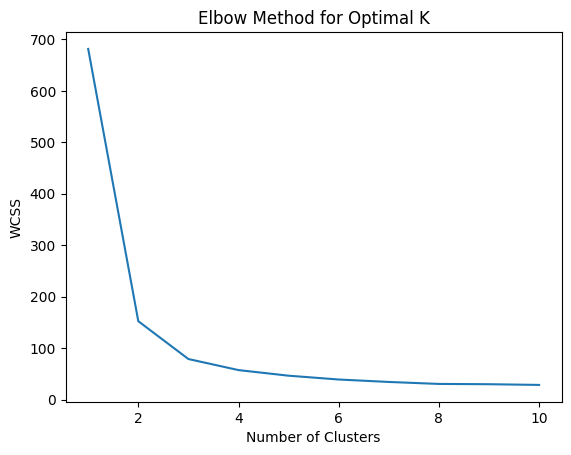

In [19]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.iloc[:, :-1])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

### **The Elbow Method for Determining Optimal Clusters in K-Means**

The **Elbow Method** is a commonly used technique to determine the optimal number of clusters in a dataset when using the **K-Means Clustering** algorithm.

---

### Why Do We Need the Elbow Method?

In K-Means, we need to specify the number of clusters `K` before we begin the algorithm. Choosing the wrong `K` can lead to poor clustering results. The Elbow Method helps identify the optimal `K` by looking at how the **within-cluster sum of squares (WCSS)** behaves as we increase the number of clusters.

#### **WCSS (Within-Cluster Sum of Squares)**

- WCSS measures the **variance** within each cluster. It is the sum of the squared distances between each point and its assigned centroid.
- A lower WCSS indicates that points are closer to their centroids, meaning that the clustering is tighter.

---

### How the Elbow Method Works

1. **Run K-Means for different values of `K`**: 
   - Start with a small value of `K` (e.g., 1) and gradually increase it, calculating the WCSS for each `K`.
   
2. **Plot the WCSS against the number of clusters `K`**:
   - The WCSS will decrease as `K` increases, because adding more clusters reduces the distance between points and their centroids.

3. **Identify the Elbow**:
   - The "elbow" in the plot is the point where the WCSS stops decreasing rapidly and begins to flatten. This indicates that adding more clusters beyond this point does not significantly improve the clustering quality.
   - The optimal `K` is often at the elbow point, as it balances minimizing WCSS and avoiding overfitting with too many clusters.

---

### Visualizing the Elbow

- When we plot the WCSS against `K`, the curve looks like an arm, and the "elbow" is the point where the curve starts to bend.
- This point represents the best trade-off between the number of clusters and the WCSS.

---

### Example of an Elbow Plot

| K (Number of Clusters) | WCSS           |
|------------------------|----------------|
| 1                      | 1000           |
| 2                      | 600            |
| 3                      | 300            |
| 4                      | 200            |
| 5                      | 150            |
| 6                      | 140            |

- As you can see from the table, the WCSS decreases significantly from `K=1` to `K=3`, but beyond that, the rate of decrease slows down. This suggests that `K=3` might be the optimal number of clusters.

---

### **Key Takeaways**:

- The Elbow Method helps choose the optimal number of clusters in K-Means by identifying the point where increasing `K` doesn't significantly reduce the WCSS.
- This technique provides a visual and intuitive way to determine the best `K` for your dataset.



### **Limitations of the Elbow Method**:

- In some cases, the elbow may not be clearly visible, making it difficult to choose the optimal `K`.
- It is a heuristic approach, and you may need to combine it with other techniques (such as the **Silhouette Score**) to make a more informed decision.
---

### Conclusion

In this notebook, we:
- Introduced the **K-Means Clustering** algorithm.
- Applied K-Means clustering to the **Iris dataset**.
- Visualized the clusters and evaluated the number of clusters using the **Elbow Method**.

K-Means is a powerful unsupervised learning algorithm that can group data into clusters based on similarity. However, choosing the optimal number of clusters can be tricky and often requires careful consideration.

---
---